In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer


In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("lihxlhx/give-me-some-credit")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'give-me-some-credit' dataset.
Path to dataset files: /kaggle/input/give-me-some-credit


In [ ]:
import os

# load dataset
csv_file_path = os.path.join(path, 'cs-training.csv')
df = pd.read_csv(csv_file_path)

In [ ]:
# rename taget column
df.rename(columns={'SeriousDlqin2yrs': 'target'}, inplace=True)

In [ ]:
df.head()

,Unnamed: 0,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
#check varible type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   target                                150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
df['MonthlyIncome'] = imputer.fit_transform(df[['MonthlyIncome']])
df['NumberOfDependents'] = imputer.fit_transform(df[['NumberOfDependents']])


In [ ]:
#drop ID column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# define features and target
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# split to training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Train random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# make predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1] # probabilities for ROC AUC

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report")
print(classification_report(y_test, y_pred))

print("\nROC AUC Score")
print(roc_auc_score(y_test, y_prob))

Confusion Matrix
[[41570   422]
 [ 2459   549]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     41992
           1       0.57      0.18      0.28      3008

    accuracy                           0.94     45000
   macro avg       0.75      0.59      0.62     45000
weighted avg       0.92      0.94      0.92     45000


ROC AUC Score
0.8400383436447367


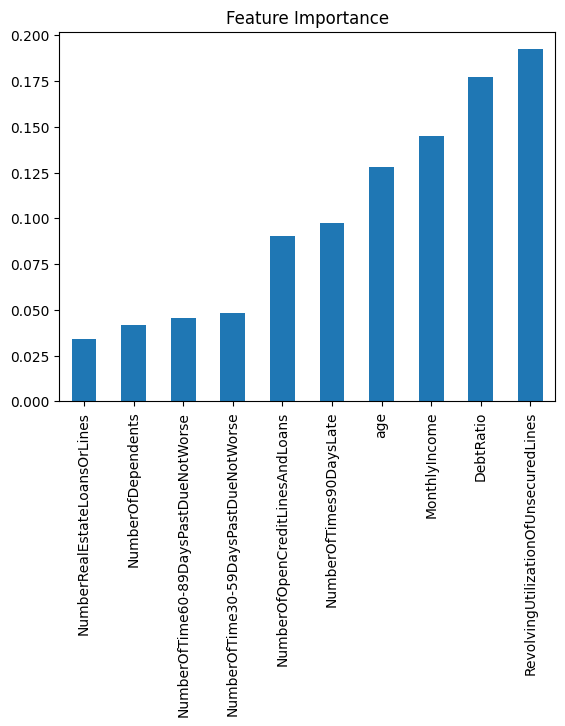

In [ ]:
# feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='bar', title='Feature Importance')
plt.show()



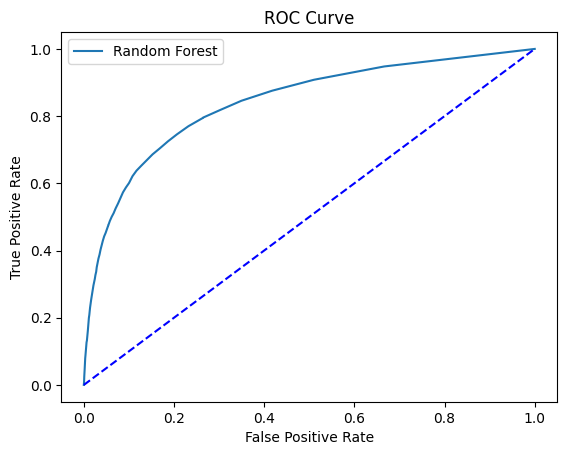

In [ ]:
# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], '--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
#